## &#128013; Modeling
# `Modeling`
<p style='text-align: right;'> 빅데이터 분석 중고급과정 with 관악구, KMR</p>
<p style='text-align: right;'> 2023 2nd | All rights reserved by Wooseok Song</p>

---

## *<font color="green">모델링</font>* 을 해봅시다!!


### 학습 목표
핵심적인 데이터 분석 및 모델링 기법을 이해하고 활용함

### 목차
1. 상관계수 뽑기
2. ANOVA, MANOVA
3. 단순 선형/다중 선형/비선형 회귀 분석 모델
4. 로지스틱 회귀 분석 모델 / confusion matrix 그리기
5. 디시젼 트리, 랜덤 포레스트 모델 / confusion matrix 그리기
6. K-mean(medoids) clustering 모델
 

In [2]:
pip install statsmodels

                                              0.0/9.2 MB ? eta -:--:--
     ---                                      0.7/9.2 MB 15.5 MB/s eta 0:00:01
     -------                                  1.8/9.2 MB 23.1 MB/s eta 0:00:01
     -------------                            3.2/9.2 MB 22.4 MB/s eta 0:00:01
     ---------------------                    4.9/9.2 MB 26.2 MB/s eta 0:00:01
     ----------------------------             6.6/9.2 MB 28.1 MB/s eta 0:00:01
     ------------------------------------     8.5/9.2 MB 30.1 MB/s eta 0:00:01
     ---------------------------------------  9.2/9.2 MB 31.0 MB/s eta 0:00:01
     ---------------------------------------- 9.2/9.2 MB 26.7 MB/s eta 0:00:00
                                              0.0/44.0 MB ? eta -:--:--
     --                                       2.5/44.0 MB 80.3 MB/s eta 0:00:01
     ----                                     4.8/44.0 MB 61.2 MB/s eta 0:00:01
     ------                                   6.7/44.0 MB 53.2 MB


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
     --                                       0.6/9.2 MB 12.0 MB/s eta 0:00:01
     -------                                  1.7/9.2 MB 18.5 MB/s eta 0:00:01
     -----------                              2.7/9.2 MB 21.5 MB/s eta 0:00:01
     -----------------                        4.2/9.2 MB 24.1 MB/s eta 0:00:01
     ------------------------                 5.7/9.2 MB 26.0 MB/s eta 0:00:01
     ---------------------------              6.3/9.2 MB 26.8 MB/s eta 0:00:01
     ---------------------------              6.3/9.2 MB 26.8 MB/s eta 0:00:01
     ---------------------------              6.3/9.2 MB 26.8 MB/s eta 0:00:01
     ---------------------------              6.3/9.2 MB 26.8 MB/s eta 0:00:01
     ----------------------------             6.5/9.2 MB 14.9 MB/s eta 0:00:01
     ------------------------------           7.0/9.2 MB 14.4 MB/s eta 0:00:01
     -----------------------------------      8.3/9.2 MB 16.


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.model_selection import train_test_split

# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

### 1. 상관계수

In [10]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


이거, 기억 하시는지...?

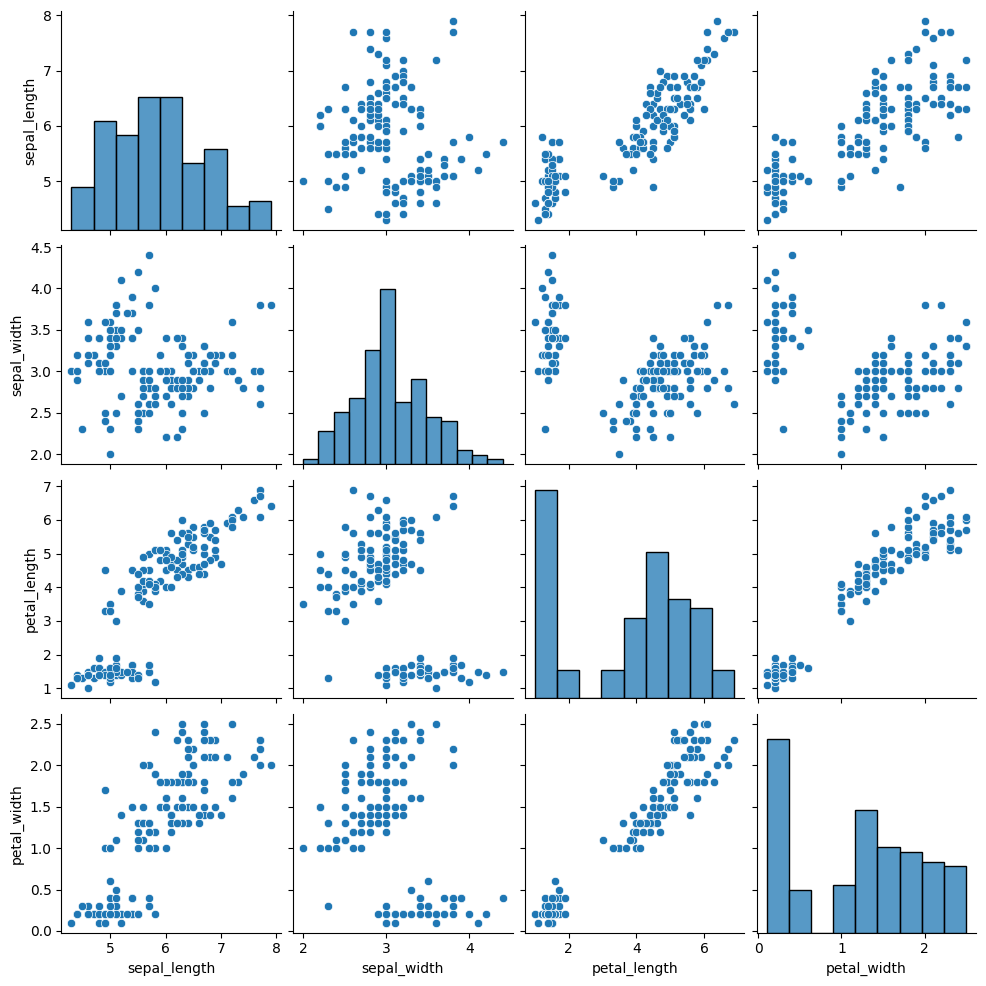

In [11]:
sns.pairplot(iris)

붓꽃의 수치형 자료들 간의 상관계수를 보자.

In [14]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [16]:
iris.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [18]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
iris = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [21]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


이번엔, 상관계수를 히트맵으로 그려보자.

<Axes: >

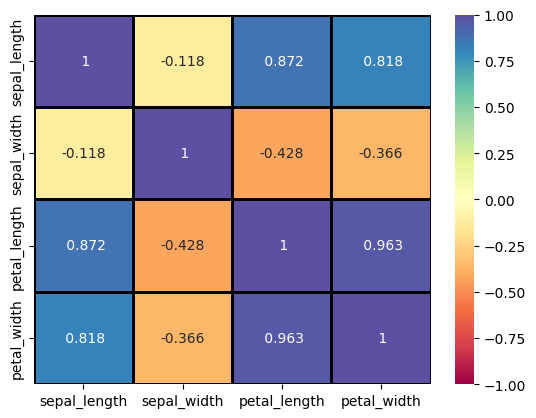

In [22]:
sns.heatmap(iris.corr(), annot = True,
            fmt = ' .3g', vmin=-1, vmax=1, center= 0, cmap= 'Spectral', linewidths=1, linecolor='black')
# annot: 플랏에 상관계수 직접 표기
# fmt: 소수점 표기 자릿수
# vmin, vmax: 히트맵 값의 최소~최대값 표기
# center: 중앙값 표기
# cmap: 컬러 변경, 다음 참조할 것: https://matplotlib.org/examples/color/colormaps_reference.html
# linewidths: 윤곽선 두께
# linecolor: 윤곽선 색


변수간의 상관관계를 보는 것은, 최초 EDA시 가장 중요하므로, 한 번에 전체 변수간의 관계를 보는 것이 일반적이다.

### 2. ANOVA, MANOVA

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


One-way ANOVA

In [13]:
model = ols('tip ~ C(size)', tips).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(size),5.0,115.640313,23.128063,15.746331,2.169463e-13
Residual,238.0,349.572164,1.468791,NaN,NaN


Multivariate ANOVA

In [14]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [15]:
formula = 'survived ~ C(sex) + C(age) + C(pclass) + C(sex):C(age) + C(sex):C(pclass) + 
                    C(age):C(pclass) + C(sex):C(age):C(pclass)'
lm = ols(formula, titanic).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,49.999087,49.999087,433.207890,4.188341e-67
C(age),87.0,19.016968,0.218586,1.893897,1.723054e-05
C(pclass),2.0,13.577254,6.788627,58.818809,2.593037e-23
C(sex):C(age),87.0,16.594838,0.190745,1.652677,6.364060e-04
C(sex):C(pclass),2.0,4.225588,2.112794,18.305914,2.341688e-08
C(age):C(pclass),174.0,21.299479,0.122411,1.060606,3.146499e-01
C(sex):C(age):C(pclass),174.0,24.966215,0.143484,1.243191,3.958741e-02
Residual,431.0,49.744261,0.115416,NaN,NaN


### 3. 선형 회귀 분석

In [23]:
# 의미있는 회귀분석은 아니지만, 결측값 처리와 행 필터링을 통해 전처리 후 간단히 실험을 해보자. 연령과 요금은 의미가 있을까?
titanic_df = titanic[(titanic["age"].isnull() == False) & (titanic["survived"].isnull() == False)&(titanic.fare < 500)]
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()    #model 생성
model.fit(titanic_df[["age"]], titanic_df[["fare"]])      

LinearRegression()

In [25]:
r_sq = model.score(titanic_df[["age"]], titanic_df[["fare"]])
 
print(r_sq)
print(model.intercept_)
print(model.coef_)

0.010079307124919001
[23.88731337]
[[0.29626832]]


In [26]:
titanic_df["predicted_fare"] = model.predict(titanic_df[["fare"]])
 
sns.relplot(x= "age", y = "fare", data = titanic_df)
sns.lineplot(x= "age", y = "predicted_fare", color="r", data = titanic_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- fare
Feature names seen at fit time, yet now missing:
- age


별 의미 없는것 같다.
### 4. 로지스틱 회귀분석
을 해보자. 

In [43]:
from sklearn.linear_model import LogisticRegression

In [97]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 29 columns):
survived                   182 non-null int64
pclass                     182 non-null int64
age                        182 non-null float64
sibsp                      182 non-null int64
parch                      182 non-null int64
fare                       182 non-null float64
adult_male                 182 non-null bool
alone                      182 non-null bool
sex_female                 182 non-null uint8
sex_male                   182 non-null uint8
embarked_C                 182 non-null uint8
embarked_Q                 182 non-null uint8
embarked_S                 182 non-null uint8
class_First                182 non-null uint8
class_Second               182 non-null uint8
class_Third                182 non-null uint8
who_child                  182 non-null uint8
who_man                    182 non-null uint8
who_woman                  182 non-null uint8
deck_A             

'sex', 'embarked', 'class', 'who', 'deck', 'embarked_town', 'alive'의 변환이 필요하다.
또한, alived는 survived와 겹치므로 제거해보자.

In [98]:
list_dummy = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town']

titanic_df = titanic.drop(['alive'], axis = 1).dropna()
titanic_df_dummy = pd.get_dummies(titanic_df[list_dummy])
titanic_df_dummy

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
1,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
10,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
11,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
21,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
23,0,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
27,0,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
52,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
54,0,1,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [99]:
titanic_df = pd.concat([titanic_df.drop(list_dummy, axis = 1), titanic_df_dummy], axis = 1)

In [103]:
x = titanic_df.drop(["survived"], axis = 1)
y = titanic_df["survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0, shuffle = True)

In [101]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [104]:
y_pred = logistic_model.predict(x_test)
round(y_pred.mean(), 3)

0.784

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.89      0.83      0.86        29

    accuracy                           0.78        37
   macro avg       0.69      0.73      0.71        37
weighted avg       0.80      0.78      0.79        37



아직 개선의 여지가 많지만, 실제 평가가 아닌 훈련 데이터를 대상으로 한 점수인 점, 아무것도 하지 않은 baseline model임을 감안하면 봐줄 만 하다. <br>
어차피 여기에서 수치가 높아지면 과적합 가능성도 높아진다.
### 5. 랜덤 포레스트
를 해보자.

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
forest_model = RandomForestClassifier(n_estimators=15000).fit(x_train, y_train)

Feature별 중요도를 보자.

In [122]:
pd.DataFrame(forest_model.feature_importances_, x_train.columns)

,0
pclass,0.011168
age,0.215482
sibsp,0.034626
parch,0.029378
fare,0.206883
adult_male,0.074913
alone,0.018573
sex_female,0.040678
sex_male,0.039891
embarked_C,0.010006


In [140]:
round(forest_model.predict(x_train).mean(), 3)

0.662

In [141]:
nth_tree = forest_model.estimators_[100] # 100th tree

In [142]:
from sklearn.tree import plot_tree # scikit-learn 0.21 부터

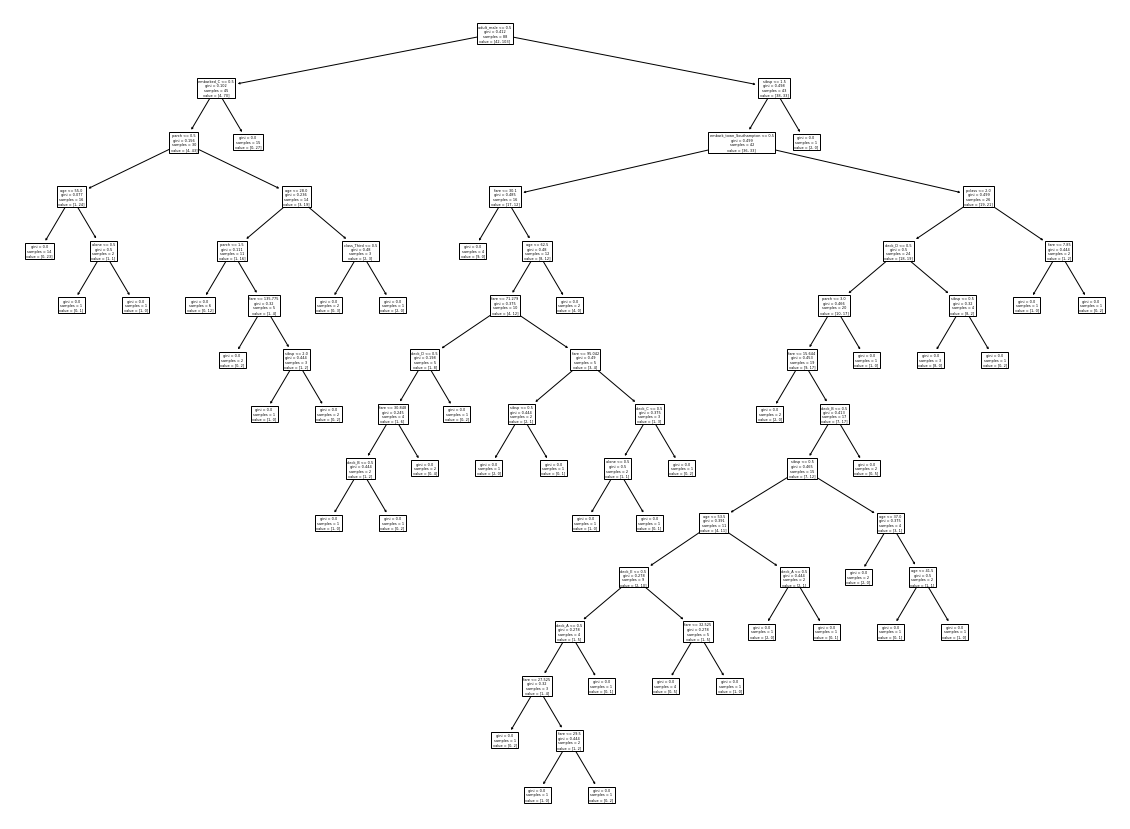

In [143]:
plt.figure(figsize=(20,15))
plot_tree(nth_tree, feature_names=x_train.columns)
plt.show()

In [145]:
print(classification_report(forest_model.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.85      0.92      0.88        25

    accuracy                           0.84        37
   macro avg       0.83      0.79      0.81        37
weighted avg       0.84      0.84      0.83        37

